**Activity 1: Migraine Drug Formulations**


A pharmaceutical company tested three formulations of a pain relief medicine for migraine headache sufferers. 27 volunteers were selected and 9 were randomly assigned to one of the three drug formulations. Subjects took the drug during their next migraine episode and reported pain on a 1–10 scale (1 = no pain, 10 = extreme pain) 30 minutes after taking the drug. The dataset, Clinical_trial, contains the results of this experiment.

Note: Some of the questions are purposefully left open-ended to support creative, multiple-
valid approaches.

1. [2pts] Visualize the pain ratings across the three drug formulations. Provide a brief
interpretation of what the graph reveals.

In [50]:
install.packages("ggh4x")

#library(ggplot2)
#library(dplyr)
library(ggh4x)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘S7’




In [4]:
clinical_trial <- read.csv("/content/Clinical_trial.csv")
clinical_trial

Drug,Pain_Rating
<chr>,<int>
A,4
A,5
A,4
A,3
A,2
A,4
A,3
A,4
A,4


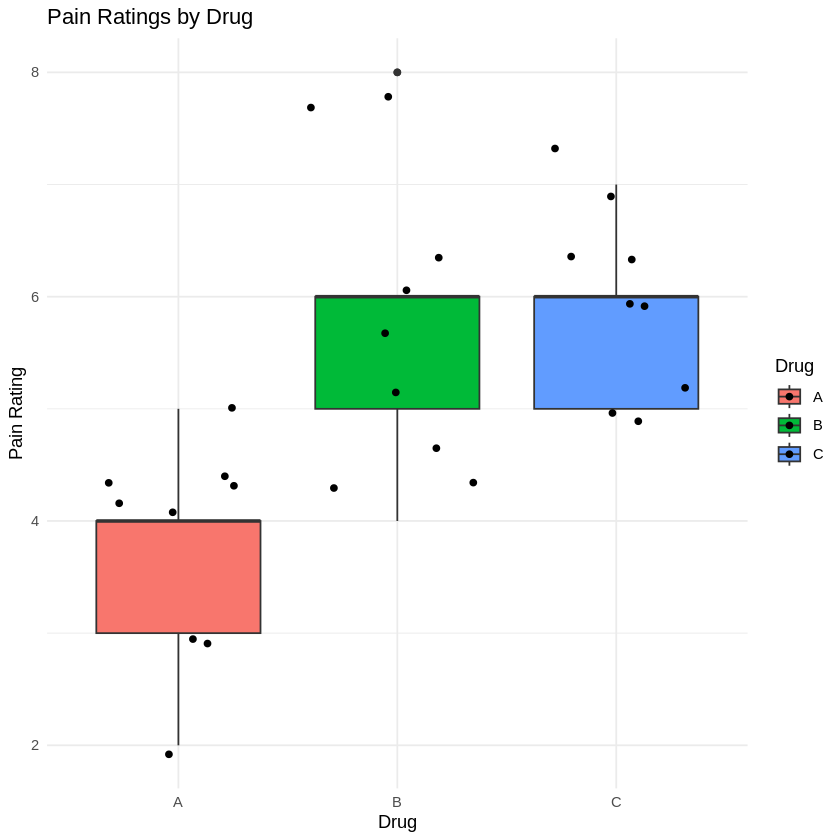

In [5]:
ggplot(clinical_trial, aes(x = Drug, y = Pain_Rating, fill = Drug)) +
  geom_boxplot() +
  geom_jitter() +
  labs(title = "Pain Ratings by Drug",
       x = "Drug",
       y = "Pain Rating") +
  theme_minimal()

- Drug A shows generally lower pain ratings, with most scores clustered around 3–5.

- Drug B appears to have slightly higher median pain ratings compared to A, with more variability.

- Drug C has the highest median pain ratings, suggesting it may be less effective at reducing migraine pain.

Interpretation:

Based on the boxplot, Drug A seems most effective, followed by Drug B, while Drug C appears least effective. However, this is only a visual inspection—statistical testing would be needed to confirm if these differences are significant.

2. [6pts] As the Data Scientist on a team of researchers at the pharmaceutical company,
your main task is to evaluate which drug formulation most effectively reduces migraine
pain. Formulate the appropriate hypotheses, perform the relevant statistical test(s),
and communicate each step of your analysis and results in clear, accessible written
language for non-technical team members

Since we are comparing more than two groups, the right test is an ANOVA (Analysis of Variance).

- Null hypothesis (H₀): All three drugs reduce migraine pain equally (mean pain ratings are the same).

- Alternative hypothesis (H₁): At least one drug differs in its effectiveness (at least one mean pain rating is different).

In [6]:
# analysis of variance testplot(tukey_res, las = 1, col = "blue")

ano_va <- aov(Pain_Rating ~ Drug, data = clinical_trial)
summary(ano_va)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Drug         2  28.22  14.111   11.91 0.000256 ***
Residuals   24  28.44   1.185                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Since the p-value is far below the common cutoff of 0.05, we reject the null hypothesis. This means the evidence strongly suggests that the drug formulations do not all perform the same.

In [7]:
# post-hoc test

tukey_res <- TukeyHSD(ano_va)
tukey_res

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Pain_Rating ~ Drug, data = clinical_trial)

$Drug
         diff        lwr      upr     p adj
B-A 2.1111111  0.8295028 3.392719 0.0011107
C-A 2.2222222  0.9406139 3.503831 0.0006453
C-B 0.1111111 -1.1704972 1.392719 0.9745173


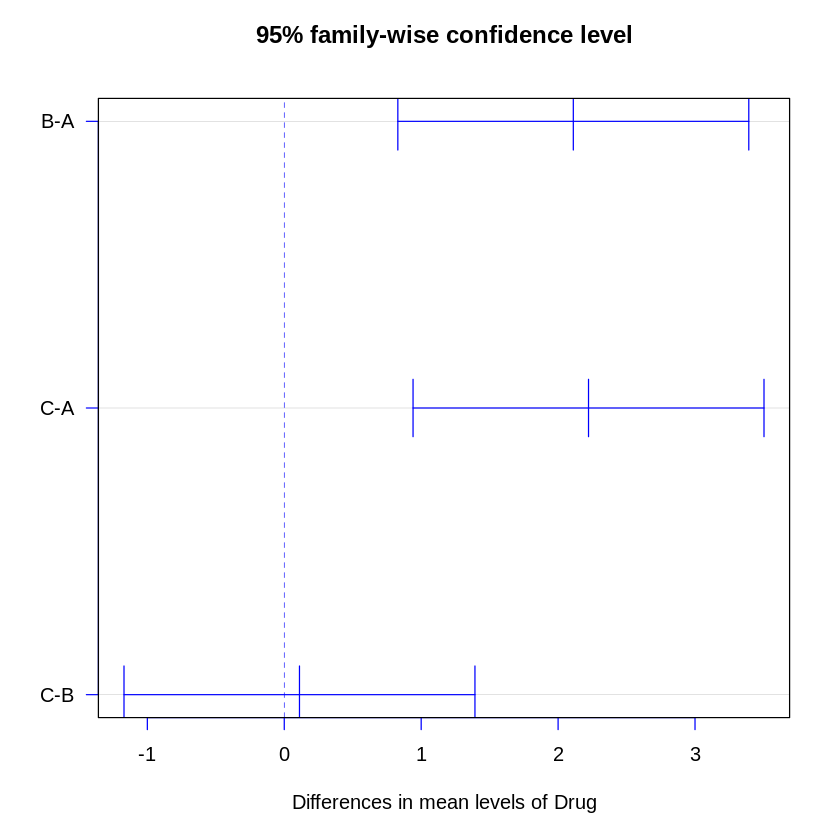

In [8]:
plot(tukey_res, las = 1, col = "blue")

- Drug B vs. Drug A

  - Difference in average pain: +2.11 (B higher pain than A)

  - p-value = 0.0011 → Significant

  - Patients on Drug B reported significantly more pain than those on Drug A.

- Drug C vs. Drug A

  - Difference in average pain: +2.22 (C higher pain than A)

  - p-value = 0.0006 → Significant

  - Patients on Drug C reported significantly more pain than those on Drug A.

- Drug C vs. Drug B

  - Difference in average pain: +0.11

  - p-value = 0.97 → Not significant

  - Drugs B and C performed about the same.



Drug A is clearly the best formulation, producing significantly lower pain ratings than both B and C.

Drugs B and C are equally less effective; there is no meaningful difference between them.

3. [2pts] Suppose we wanted to build a supervised learning model using this dataset. What
would be the prediction goal? Discuss in what situations a pharmaceutical company
might prioritize inference over prediction, and vice versa.

If we were to build a supervised learning model with this dataset, the goal would be to predict a patient’s pain rating (numeric outcome) based on which drug they were given.

- Input (features): Drug formulation (A, B, or C)

- Output (target): Pain_Rating

This is a regression problem (since Pain_Rating is numeric).



Inference is about understanding drug effectiveness (research & approval), while prediction is about forecasting patient outcomes (personalized treatment & deployment).

- A pharmaceutical company would prioritize inference when the main goal is to understand the causal effect ( Why ? ) of each drug on pain reduction

- The company might prioritize prediction ( What ? ) when the main goal is to forecast outcomes for new patients.

**Activity 2: Fast-Food Promotion Strategies**

A fast-food chain is preparing to launch a new menu item but remains uncertain about which of three potential marketing campaigns will generate the greatest impact. To evaluate the effectiveness of each promotion, the chain introduced the new item across several randomly selected markets, assigning a different campaign to each location. Weekly sales of the new product were recorded over a four-week period.

The dataset, WA_Marketing-Campaign, provides the collected information for this study. You can find additional details about the data and study design here.


Dataset Description :
- MarketID: unique identifier for each market
- MarketSize: size of the market area by sales
- LocationID: unique identifier for each store location
- AgeOfStore: age of the store in years
- Promotion: promotion type (1, 2, or 3)
- week: week number (1–4)
- SalesInThousands: sales amount in $1000s

Note: Some of the questions are purposefully left open-ended to support creative, multiple-valid approaches.

In [9]:
marketing_campaign <- read.csv("/content/WA_Marketing-Campaign.csv")
head(marketing_campaign)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>
1,1,Medium,1,4,3,1,33.73
2,1,Medium,1,4,3,2,35.67
3,1,Medium,1,4,3,3,29.03
4,1,Medium,1,4,3,4,39.25
5,1,Medium,2,5,2,1,27.81
6,1,Medium,2,5,2,2,34.67


1. [3pts] Conduct an exploratory data analysis using appropriate visualizations. For ex-ample, examine sales by promotion, compare weekly sales trends across promotions, and explore sales by market size.

[Hint: convert Promotion and week to categorical variable. In R, use as.character() or factor() functions.]

In [34]:
# Changing the variable type for promotion / week -

  marketing_campaign$Promotion <- as.factor(marketing_campaign$Promotion)
  marketing_campaign$week <- as.factor(marketing_campaign$week)

  head(marketing_campaign)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
,<int>,<fct>,<int>,<int>,<fct>,<fct>,<dbl>
1,1,Medium,1,4,3,1,33.73
2,1,Medium,1,4,3,2,35.67
3,1,Medium,1,4,3,3,29.03
4,1,Medium,1,4,3,4,39.25
5,1,Medium,2,5,2,1,27.81
6,1,Medium,2,5,2,2,34.67


In [35]:
# EDA - 1 : examine sales by promotion

library(dplyr)

marketing_campaign %>%
  group_by(Promotion) %>%
  summarise(
    mean_sales = mean(SalesInThousands, na.rm = TRUE),
    sd_sales   = sd(SalesInThousands, na.rm = TRUE),
    n_obs      = n()
  )

Promotion,mean_sales,sd_sales,n_obs
<fct>,<dbl>,<dbl>,<int>
1,58.09901,16.55378,172
2,47.32941,15.10895,188
3,55.36447,16.76623,188


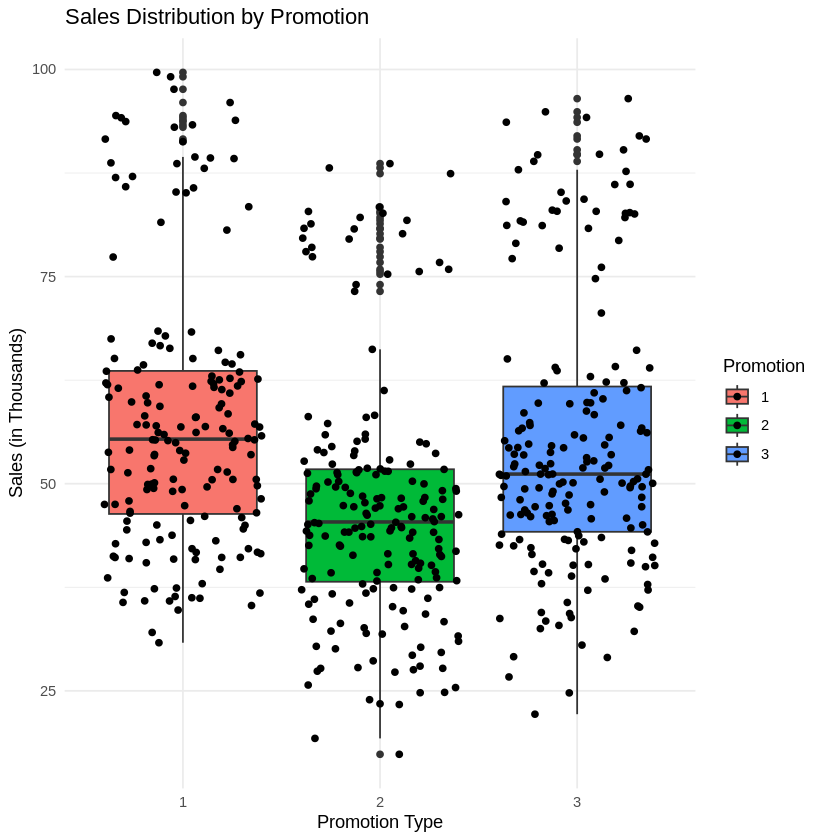

In [36]:
library(ggplot2)

ggplot(marketing_campaign, aes(x = Promotion, y = SalesInThousands, fill = Promotion)) +
  geom_boxplot() +
  geom_jitter()+
  labs(title = "Sales Distribution by Promotion",
       x = "Promotion Type",
       y = "Sales (in Thousands)") +
  theme_minimal()

In [43]:
# 2 - compare weekly sales trends across promotions

library(dplyr)

weekly_sales_trend <- marketing_campaign %>%
  group_by(Promotion, week) %>%
  summarise(mean_sales = mean(SalesInThousands))

weekly_sales_trend

`summarise()` has grouped output by 'Promotion'. You can override using the
`.groups` argument.


Promotion,week,mean_sales
<fct>,<fct>,<dbl>
1,1,58.24442
1,2,56.92953
1,3,58.77488
1,4,58.44721
2,1,47.73021
2,2,47.58255
2,3,47.72213
2,4,46.28277
3,1,55.77617


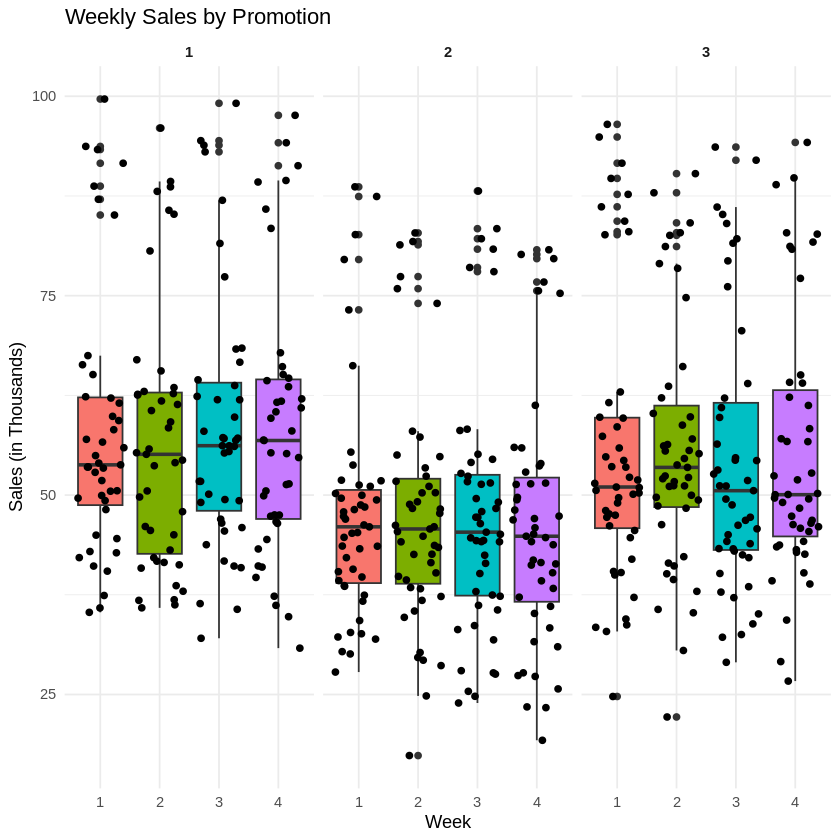

In [52]:
#library(ggplot2)
#library(ggh4x)
#library(dplyr)


# Make factors for proper ordering
marketing_campaign <- marketing_campaign %>%
  mutate(
    Promotion = factor(Promotion),
    week = factor(week)
  )

# Nested x-axis boxplot
ggplot(marketing_campaign, aes(x = week, y = SalesInThousands)) +
  geom_boxplot(aes(fill = week)) +
  geom_jitter() +
  facet_nested(~ Promotion, scales = "free_x", nest_line = TRUE) +
  labs(
    title = "Weekly Sales by Promotion",
    x = "Week",
    y = "Sales (in Thousands)"
  ) +
  theme_minimal() +
  theme(
    strip.text = element_text(face = "bold"),
    legend.position = "none"
  )

In [53]:
# EDA - 3 : explore sales by market size

marketing_campaign %>%
  group_by(MarketSize) %>%
  summarise(
    mean_sales = mean(SalesInThousands, na.rm = TRUE),
    sd_sales   = sd(SalesInThousands, na.rm = TRUE),
    n_obs      = n()
  )

MarketSize,mean_sales,sd_sales,n_obs
<fct>,<dbl>,<dbl>,<int>
Small,57.40933,6.633101,60
Medium,43.98534,9.051378,320
Large,70.11673,17.052156,168


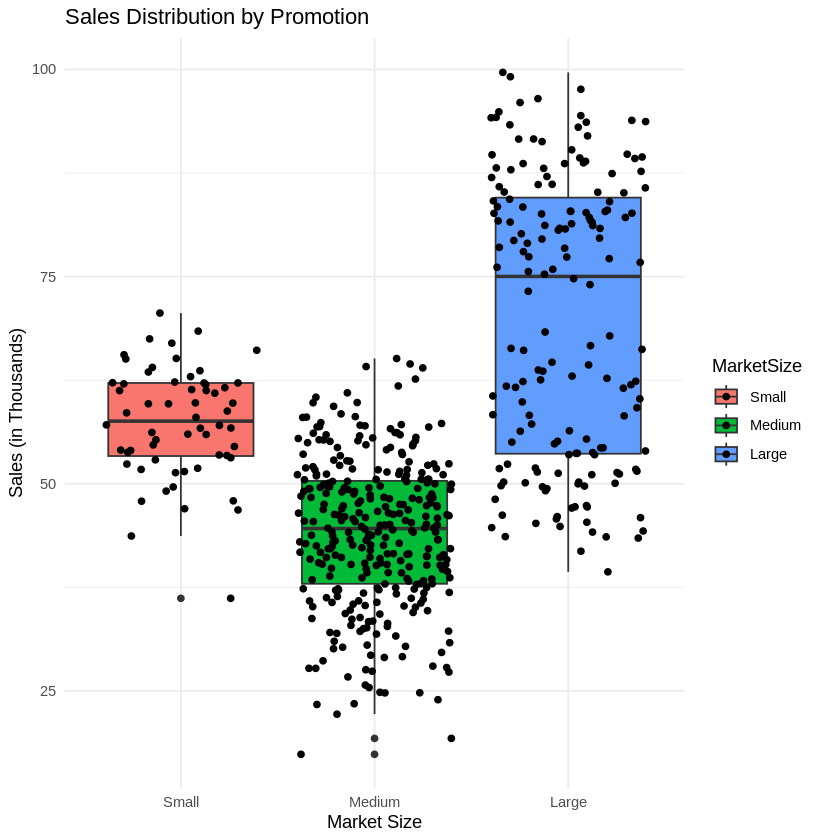

In [54]:
ggplot(marketing_campaign, aes(x = MarketSize, y = SalesInThousands, fill = MarketSize)) +
  geom_boxplot() +
  geom_jitter()+
  labs(title = "Sales Distribution by Promotion",
       x = "Market Size",
       y = "Sales (in Thousands)") +
  theme_minimal()

2. [5pts] Identify research questions that would be of interest to the fast-food chain. For questions suited to statistical inference, clearly state hypotheses, perform the relevant statistical test(s), and summarize your findings for each step of your analysis

Research Questions :

- Does the type of promotion affect weekly sales?

- Do larger stores have higher sales than medium/small stores?

- Does the age of the store influence sales?

- Do sales trends differ across weeks?

- Is there an interaction between promotion type and market size on sales?


1. Does the type of promotion affect weekly sales?

- Null hypothesis (H₀): Mean weekly sales are the same across all promotion types.

- Alternative hypothesis (H₁): At least one promotion type has a different mean sales

             Df Sum Sq Mean Sq F value   Pr(>F)    
Promotion     2  11449    5725   21.95 6.77e-10 ***
Residuals   545 142114     261                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

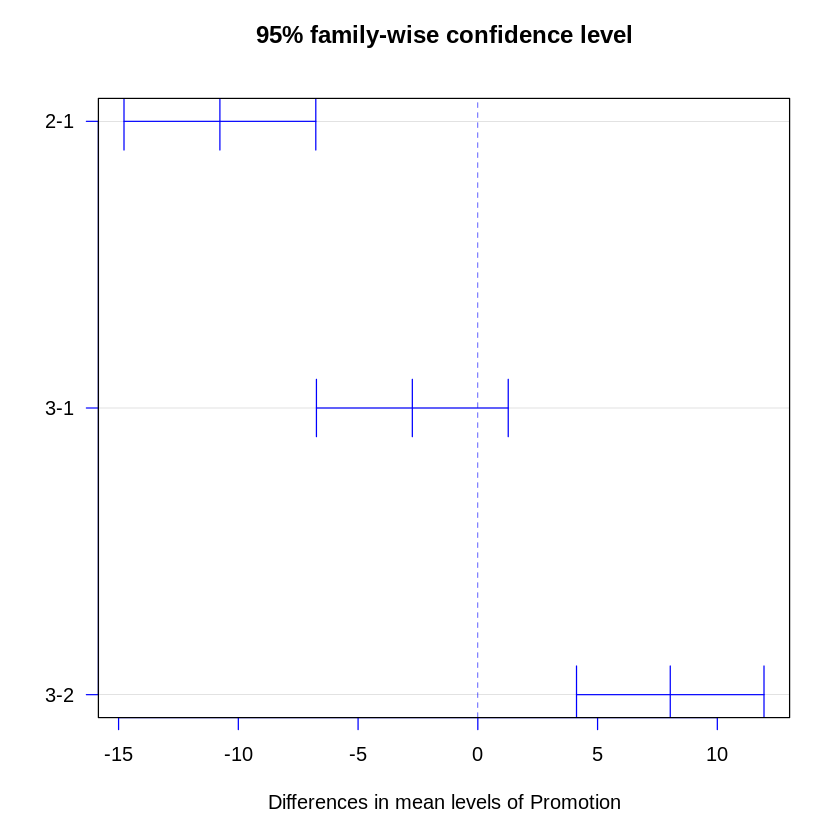

In [20]:
marketing_campaign$Promotion <- factor(marketing_campaign$Promotion)

ano_va <- aov(SalesInThousands ~ Promotion, data = marketing_campaign)
summary(ano_va)

#post-hoc analysis

tukey_res <- TukeyHSD(ano_va)

# Plot Tukey confidence intervals
plot(tukey_res, las = 1, col = "blue")

2. Do larger stores have higher sales than medium/small stores?

- Null hypothesis (H₀): Average sales are the same across all market sizes.

- Alternative hypothesis (H₁): At least one market size has a different average sales.

             Df Sum Sq Mean Sq F value Pr(>F)    
MarketSize    2  76273   38136   268.9 <2e-16 ***
Residuals   545  77290     142                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

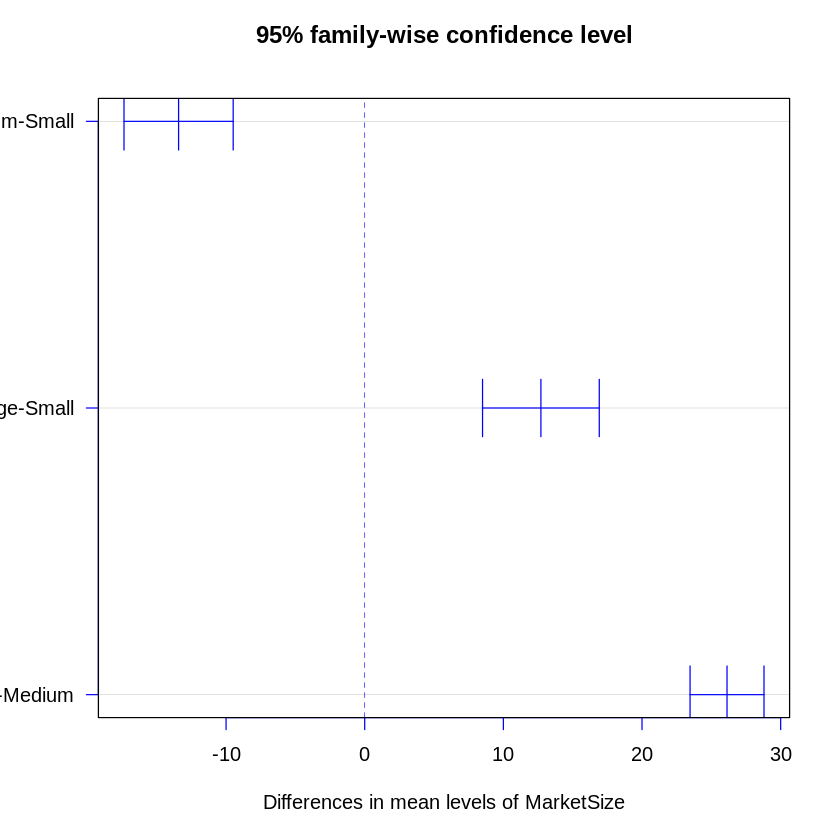

In [21]:
marketing_campaign$MarketSize <- factor(marketing_campaign$MarketSize, levels = c("Small","Medium","Large"))


anova_market <- aov(SalesInThousands ~ MarketSize, data = marketing_campaign)
summary(anova_market)


tukey_res_market <- TukeyHSD(anova_market)

plot(tukey_res_market, las = 1, col = "blue")

3. Does the age of the store influence sales?

- Null hypothesis (H₀): Store age has no effect on weekly sales (no relationship).

- Alternative hypothesis (H₁): Store age affects weekly sales (older/younger stores sell differently).

In [22]:
model_store_age <- lm(SalesInThousands ~ AgeOfStore, data = marketing_campaign)
summary(model_store_age)


Call:
lm(formula = SalesInThousands ~ AgeOfStore, data = marketing_campaign)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.379 -10.762  -2.870   7.078  45.715 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 54.07861    1.16441  46.443   <2e-16 ***
AgeOfStore  -0.07202    0.10797  -0.667    0.505    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.76 on 546 degrees of freedom
Multiple R-squared:  0.0008141,	Adjusted R-squared:  -0.001016 
F-statistic: 0.4449 on 1 and 546 DF,  p-value: 0.5051


p-value for AgeOfStore > 0.05, store age has no effect on weekly sales

4. Do sales trends differ across weeks?

- Null hypothesis (H₀): Mean sales are the same across all weeks.

- Alternative hypothesis (H₁): At least one week has different mean sales.

             Df Sum Sq Mean Sq F value Pr(>F)
week          3     24    8.02   0.028  0.994
Residuals   544 153539  282.24               

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = SalesInThousands ~ week, data = marketing_campaign)

$week
          diff       lwr      upr     p adj
2-1 -0.4040146 -5.634928 4.826899 0.9972060
3-1 -0.3159854 -5.546899 4.914928 0.9986555
4-1 -0.5775182 -5.808432 4.653395 0.9919648
3-2  0.0880292 -5.142884 5.318943 0.9999707
4-2 -0.1735036 -5.404417 5.057410 0.9997760
4-3 -0.2615328 -5.492446 4.969381 0.9992355


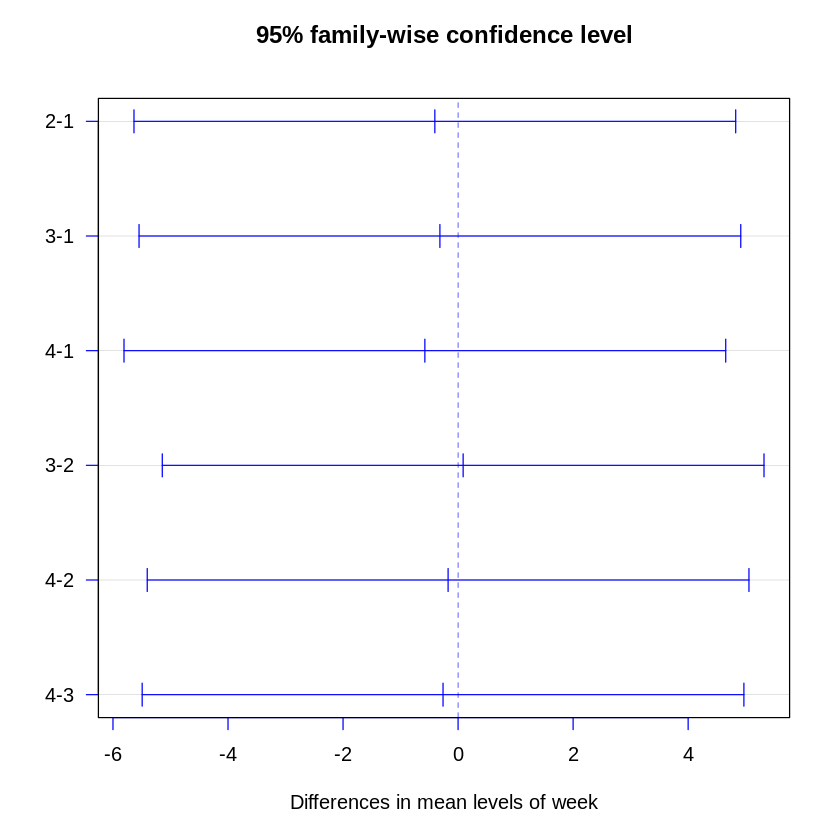

In [23]:
# Convert week to factor
marketing_campaign$week <- factor(marketing_campaign$week)

# Run ANOVA
anova_week <- aov(SalesInThousands ~ week, data = marketing_campaign)
summary(anova_week)

#PostHoc
TukeyHSD(anova_week)

plot(TukeyHSD(anova_week), las = 1, col = "blue")

ANOVA p > 0.05: Can't \Reject H₀ → Mean sales are the same across all weeks.

5. Is there an interaction between promotion type and market size on sales?

- Null hypothesis (H₀): There is no interaction between Promotion and MarketSize — the effect of promotion is the same across all market sizes.

- Alternative hypothesis (H₁): There is an interaction — the effect of promotion differs by market size.

In [56]:
anova_interaction <- aov(SalesInThousands ~ Promotion * MarketSize, data = marketing_campaign)
summary(anova_interaction)

                      Df Sum Sq Mean Sq F value  Pr(>F)    
Promotion              2  11449    5725  49.611 < 2e-16 ***
MarketSize             2  77803   38902 337.136 < 2e-16 ***
Promotion:MarketSize   4   2117     529   4.586 0.00119 ** 
Residuals            539  62194     115                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

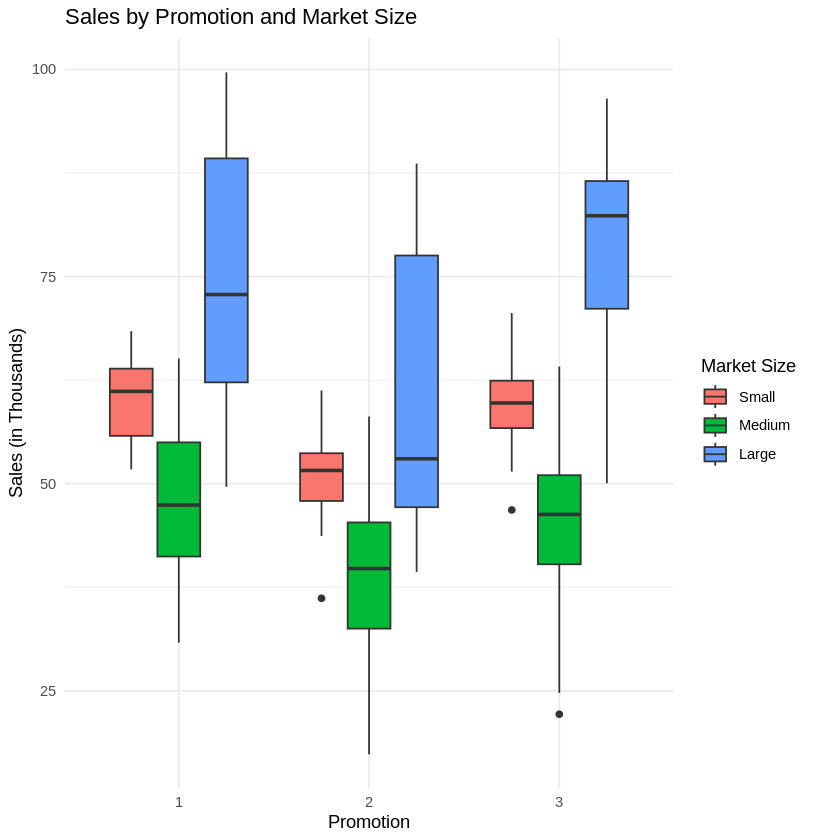

In [61]:
ggplot(marketing_campaign, aes(x = Promotion, y = SalesInThousands, fill = MarketSize)) +
  geom_boxplot() +
  labs(
    title = "Sales by Promotion and Market Size",
    x = "Promotion",
    y = "Sales (in Thousands)",
    fill = "Market Size"
  ) +
  theme_minimal()

3. [2pts] Reflect on why the fast-food chain might emphasize statistical inference versus predictive modeling. Discuss how market size or store age could influence promotion effectiveness and overall sales.


Part I :

The fast-food chain might emphasize inference when the goal is understanding causal relationships.

For example:

- Does Promotion 1 truly increase sales compared to other promotions?

- Do large markets respond differently to promotions than small markets?

- Does store age affect sales trends?

Prediction is used when the goal is forecasting future sales or estimating outcomes for new scenarios. For example:

- Predict weekly sales for a store given its market size, age, and promotion type.

- Forecasting revenue under different marketing plans.


In practice:

- Inference allows managers to make data-driven strategic decisions with confidence, because it tests whether observed effects are statistically significant and not due to random variation.

  - Early-stage decisions (e.g., testing a new promotion) rely on inference.


- Prediction prioritizes accuracy on unseen data rather than explaining why sales differ.

  - Operational planning or automation (e.g., inventory management, staffing) relies on prediction

Part II -

Market Size:

- Larger markets often have more customers, so promotions may generate larger absolute sales gains.

- Smaller markets may respond differently, with smaller but proportionally similar gains.

- Statistical analysis (interaction tests) can reveal whether a promotion’s effectiveness depends on market size.

Store Age:

- Older stores may have a loyal customer base, leading to more stable sales.

- Newer stores may be more sensitive to promotions to attract customers.

- Including store age in analyses helps tailor promotions and identify where marketing investment is most effective.

Overall:

Market size and store age are contextual factors that modulate promotion effectiveness and overall sales. Considering them allows the chain to optimize marketing strategies for different stores and markets.